# Hometask 6 #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Домашнее задание

Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):


Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$}
$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

## Задание

* Оценить  ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8
* Обосновать численно и графически стационарность
* Построить график распределеиня $n(\xi)$
* Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.
* Дополнительная: построить график зависимости ${\rm E} n(\xi)$ от N - размера графа (NxN). Что можно сказать о скорости роста ${\rm E} n(\xi)$ как функции от N?

#### Будем считать соседними те графы, которые отличается значением в единственной точке

In [2]:
#Expectation of graph 8x8

def step(current, xlim = 8, ylim = 8):
    x = np.random.randint(xlim)
    y = np.random.randint(ylim)
    if(current[x, y] == 1):
        current[x, y] = 0
    elif(x > 0 and x < xlim - 1):
        if(y > 0 and y < ylim - 1):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
    elif(x == 0):
        if(y > 0 and y < ylim - 1):
            if(current[x + 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x + 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x + 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
    else: # x == xlim - 1
        if(y > 0 and y < ylim - 1):
            if(current[x - 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x - 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x - 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
                
    return current

n = 10000
current = np.zeros((8, 8))
#current[np.arange(8), np.arange(8)[::-1]] = current[np.arange(8), np.arange(8)] + 1
walk = []
xlim = len(current[0, :])
ylim = len(current[:, 0])
for i in range(n):
    current = step(current)
    walk.append(np.sum(current))

expect = np.sum(walk) / len(walk)
print(expect, np.sum(walk[500::20]) / len(walk[500::20]))
      #Expectation and Expectation without probe interval and without correlations 

15.2887 15.338947368421053


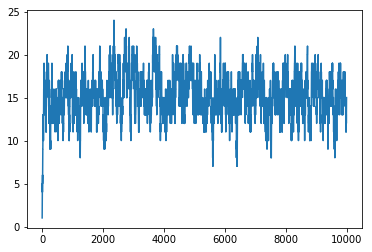

(Ttest_indResult(statistic=-2.299325771554071, pvalue=0.021639962221971187),
 Ttest_indResult(statistic=-0.5874134313310209, pvalue=0.5655037884551956))

In [3]:
#Stationary

def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

plt.plot(walk)
plt.show()

g_test(walk[500:]), g_test(walk[500::80])

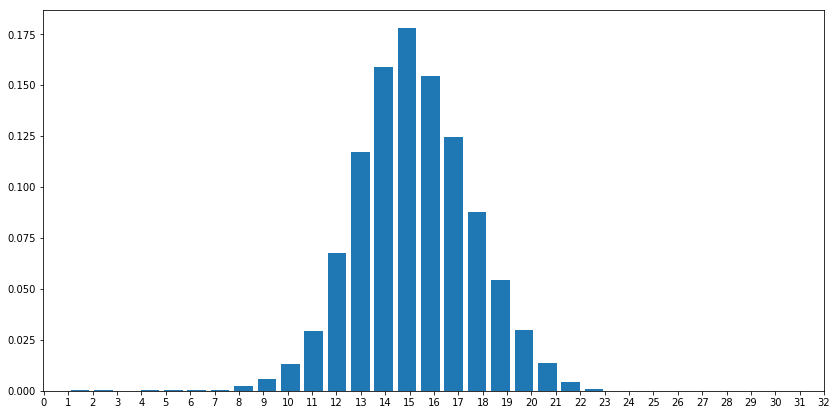

In [4]:
#density or pdf

plt.figure(figsize = (14, 7))
plt.hist(walk, bins = np.int(np.max(walk)), rwidth=0.8, density=True)
plt.xticks(np.arange(33)) # 32 -- max amount of '1' in graph 8x8
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


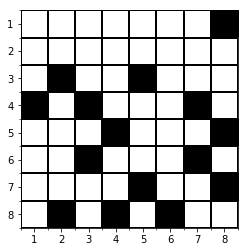

In [5]:
#Image of stationary graph

'''
for i in range(20):
    current = step(current)
    walk.append(np.sum(current))
'''
print(current)

plt.imshow((current + 1) % 2, cmap = 'gray', vmin=0, vmax=1, aspect='equal')
ax = plt.gca()
ax.set_xticks(np.arange(0, 8, 1))
ax.set_yticks(np.arange(0, 8, 1))
ax.set_xticklabels(np.arange(1, 9, 1))
ax.set_yticklabels(np.arange(1, 9, 1))
ax.set_xticks(np.arange(-.5, 8, 1), minor=True)
ax.set_yticks(np.arange(-.5, 8, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
plt.show()

N = 4  Expect = 4.0824
N = 5  Expect = 6.2839
N = 6  Expect = 8.669
N = 7  Expect = 12.0429
N = 8  Expect = 15.1592
N = 9  Expect = 19.3091
N = 10  Expect = 23.4182
N = 11  Expect = 28.3989
N = 12  Expect = 33.4774
N = 13  Expect = 38.9644
N = 14  Expect = 45.3658
N = 15  Expect = 51.9181
N = 16  Expect = 58.5041
N = 17  Expect = 66.4664
N = 18  Expect = 73.9207
N = 19  Expect = 83.101


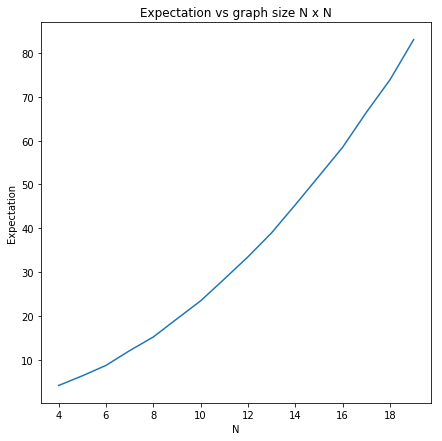

In [6]:
#Expectation of graph NxN

N = np.arange(4, 20)
expect = []
for i in range(len(N)):
    n = 10000
    current = np.zeros((N[i], N[i]))
    walk = []
    xlim = len(current[0, :])
    ylim = len(current[:, 0])
    for j in range(n):
        current = step(current, N[i], N[i])
        walk.append(np.sum(current))

    expect.append(np.sum(walk) / len(walk))
    print('N =', N[i], ' Expect =', expect[i])
    
# Expect ~ N^2 / 4
plt.figure(figsize = (7, 7))
plt.plot(N, expect)
plt.xlabel('N')
plt.ylabel('Expectation')
plt.title('Expectation vs graph size N x N')
plt.show()

Можно сказать, что En(ξ) растёт как N^2